In [1]:
!pip install keras_tuner==1.1.0

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras_tuner as kt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, activations
from tensorflow.keras import initializers
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers



In [3]:
colnames = ['class', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'id']
df_monk1_train = pd.read_csv("./data/MONK/monks-1.train", sep = " ", skipinitialspace=True, names = colnames)
df_monk1_train.drop('id', axis = 1, inplace = True)
df_monk1_test = pd.read_csv("./data/MONK/monks-1.test", sep = " ", skipinitialspace=True, names = colnames)
df_monk1_test.drop('id', axis = 1, inplace = True)
df_monk1_train.head()

,class,a1,a2,a3,a4,a5,a6
0,1,1,1,1,1,3,1
1,1,1,1,1,1,3,2
2,1,1,1,1,3,2,1
3,1,1,1,1,3,3,2
4,1,1,1,2,1,2,1


In [4]:
#subdivide data
X_train = df_monk1_train.iloc[:, 1:7].values
y_train = df_monk1_train.iloc[:, 0].values
X_test = df_monk1_test.iloc[:, 1:7].values
y_test = df_monk1_test.iloc[:, 0].values
print(X_train.shape[1])


6


In [5]:
#define a model
def create_model(hp):
    model = Sequential()
    model.add(layers.Dense(units=hp.Int('units', min_value=6, max_value=72, step=6), input_dim=6, kernel_initializer='random_normal', activation='relu' ))
    model.add(layers.Dense(units=hp.Int('units', min_value=6, max_value=72, step=6), activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])), metrics=['accuracy'])
    return model
    


In [6]:
tuner = kt.RandomSearch(
    create_model,
    objective='val_accuracy',
    max_trials=5,
)
tuner.search_space_summary()


INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json
Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 6, 'max_value': 72, 'step': 6, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [7]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train, y_train, epochs=150, batch_size=10, verbose=0, callbacks=[stop_early], validation_split=0.1  )
hyperparameters = tuner.get_best_hyperparameters(1)[0]
print(hyperparameters.get('units'))
print(hyperparameters.get('learning_rate'))


INFO:tensorflow:Oracle triggered exit
72
0.001


[1.0, 0.5384615659713745, 0.3076923191547394, 0.23076923191547394, 0.5384615659713745, 0.5384615659713745, 0.5384615659713745, 0.5384615659713745, 0.5384615659713745, 0.5384615659713745, 0.5384615659713745, 0.5384615659713745, 0.5384615659713745, 0.5384615659713745, 0.6153846383094788, 0.6153846383094788, 0.6153846383094788, 0.6153846383094788, 0.6153846383094788, 0.5384615659713745, 0.6153846383094788, 0.5384615659713745, 0.6153846383094788, 0.6153846383094788, 0.5384615659713745, 0.6153846383094788, 0.6153846383094788, 0.6153846383094788, 0.6153846383094788, 0.5384615659713745, 0.5384615659713745, 0.5384615659713745, 0.6153846383094788, 0.6153846383094788, 0.5384615659713745, 0.5384615659713745, 0.5384615659713745, 0.6153846383094788, 0.5384615659713745, 0.5384615659713745, 0.5384615659713745, 0.6153846383094788, 0.6153846383094788, 0.6153846383094788, 0.6153846383094788, 0.6153846383094788, 0.6153846383094788, 0.5384615659713745, 0.6153846383094788, 0.5384615659713745, 0.61538463830

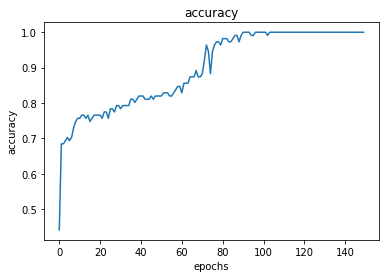

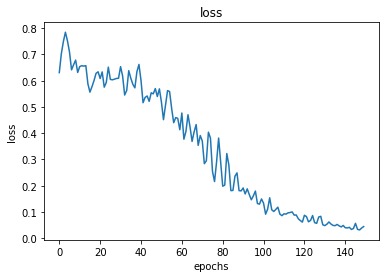

In [8]:
model = create_model(hyperparameters)
history = model.fit(X_train, y_train, epochs=150, verbose=0, validation_split=0.1)
print(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d9d840c9-75b3-4185-bb01-105f5cca8d83' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>